In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn import metrics

In [36]:
df = pd.read_csv("/content/house_data.csv")

In [37]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [38]:
df.shape

(21613, 21)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [40]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [41]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [42]:
df["date"] = pd.to_datetime(df["date"]) # convert the date column to right format
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

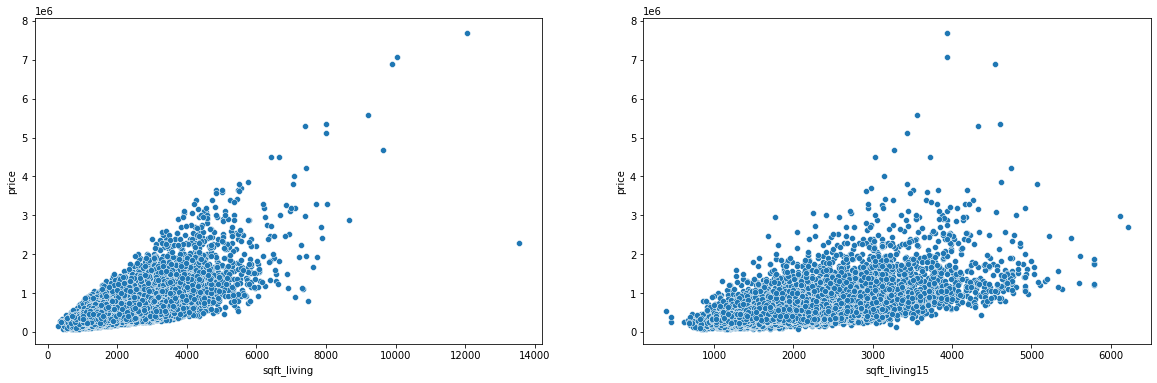

In [43]:
fig,ax = plt.subplots(1,2,figsize=(20,6))
sns.scatterplot(x=df['sqft_living'], y=df['price'], ax=ax[0])
sns.scatterplot(x=df['sqft_living15'], y=df['price'], ax=ax[1])

In [44]:
print("Number of houses whose sqft_living decrease after renovation: ",len(df[df["sqft_living"]>df["sqft_living15"]]))
print("Number of houses whose sqft_living increased after renovation: ",len(df[df["sqft_living"]<df["sqft_living15"]]))
print("Number of houses whose sqft_living remains same after renovation: ",len(df[df["sqft_living"]==df["sqft_living15"]]))

Number of houses whose sqft_living decrease after renovation:  9841
Number of houses whose sqft_living increased after renovation:  9206
Number of houses whose sqft_living remains same after renovation:  2566


<AxesSubplot:xlabel='condition', ylabel='price'>

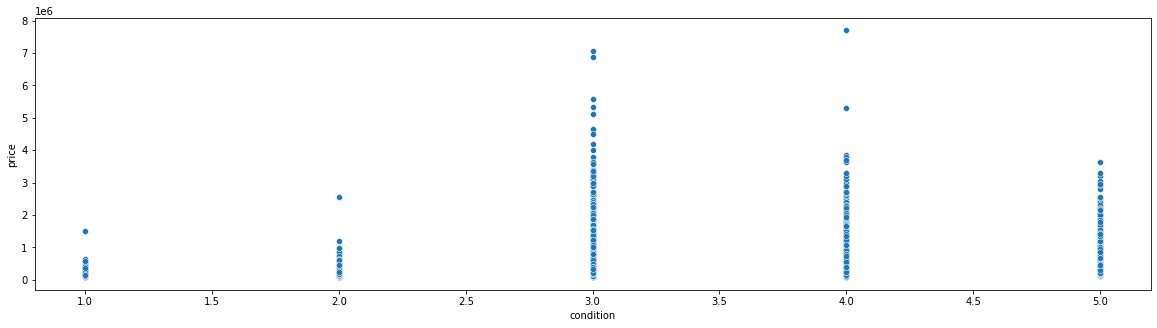

In [45]:
plt.figure(figsize=(20,5))
sns.scatterplot(x=df['condition'], y=df['price'])

<AxesSubplot:xlabel='grade', ylabel='price'>

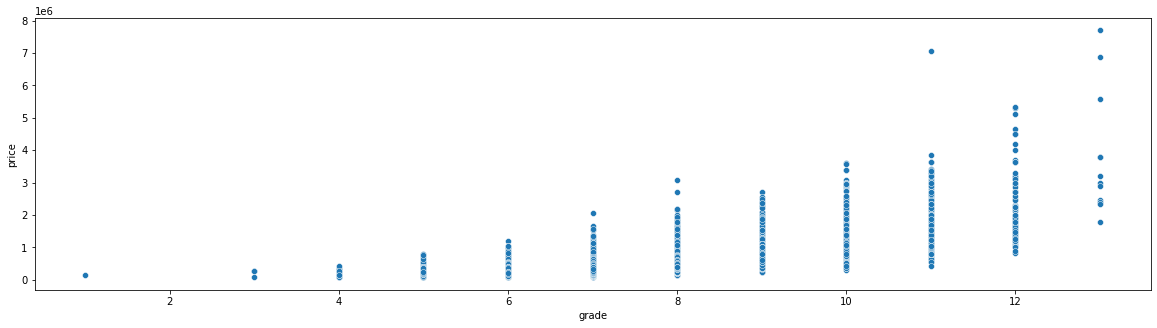

In [46]:
plt.figure(figsize=(20,5))
sns.scatterplot(x=df['grade'], y=df['price'])

<AxesSubplot:>

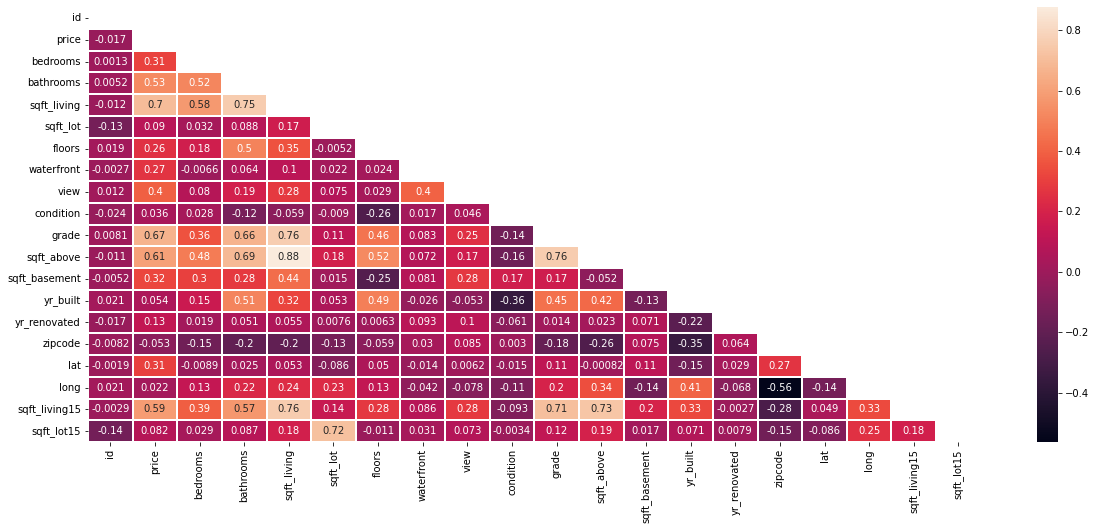

In [47]:
plt.figure(figsize=(20,8))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot=True, linewidths=0.2, mask=mask)

In [48]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [76]:
clean_data = df.drop(columns=['id','date','zipcode', 'condition',
       'sqft_basement', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_lot', 'waterfront', 'view'])
clean_data.head()

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,yr_built
0,221900.0,3,1.00,1180,1.0,7,1180,1955
1,538000.0,3,2.25,2570,2.0,7,2170,1951
2,180000.0,2,1.00,770,1.0,6,770,1933
3,604000.0,4,3.00,1960,1.0,7,1050,1965
4,510000.0,3,2.00,1680,1.0,8,1680,1987


Train Test Split

In [77]:
X = clean_data.drop(columns=['price'], axis =1)
y = clean_data['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
len(X_train), len(X_test)

(15129, 6484)

In [78]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade', 'sqft_above',
       'yr_built'],
      dtype='object')

In [79]:
s_scale = StandardScaler() # scalling down the values to same scale.
X_train = s_scale.fit_transform(X_train)
X_test = s_scale.transform(X_test)

In [80]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.intercept_)
print(lr.coef_)

537640.1731773415
[ -44033.99031572   38751.54279952  187520.42409694   15866.3263269
  151016.85530385  -22261.14613432 -119025.43535643]


In [81]:
y_pred = lr.predict(X_test)

In [82]:
comparison = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
comparison['Predicted'] = comparison['Predicted'].round(2)
comparison.head(10)

,Actual,Predicted
735,365000.0,505568.30
2830,865000.0,680805.10
4106,1038000.0,1163620.01
16218,1490000.0,1559664.04
19964,711000.0,706908.00
1227,211000.0,350121.16
18849,790000.0,753695.09
19369,680000.0,436160.35
20164,384500.0,404322.60
7139,605000.0,483471.92


In [83]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score (R^2):",lr.score(X_test,y_test))

MAE: 148417.41620190575
MSE: 56577855147.69438
RMSE: 237860.99963569982
Score (R^2): 0.6080957648411351


In [84]:
rf = RandomForestRegressor(n_estimators=100,criterion='squared_error',n_jobs=2)
rf.fit(X_train,y_train)

RandomForestRegressor(n_jobs=2)

In [85]:
rf_predict = rf.predict(X_test)

In [97]:
X_test[0]

array([ 0.67921258,  0.18036675, -0.00393099,  0.92007506,  0.29547927,
        0.34287342,  0.50412404])

In [96]:
rf_predict[0]

445378.67

In [86]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_predict))  
print('MSE:', metrics.mean_squared_error(y_test, rf_predict))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_predict)))
print("Score (R^2):",rf.score(X_test,y_test))

MAE: 138402.20978379546
MSE: 52940823627.95685
RMSE: 230088.72990208984
Score (R^2): 0.6332888028640604


In [87]:
rf_r2 = r2_score(y_test, rf_predict)

In [88]:
print("Score (R^2):",rf_r2)

Score (R^2): 0.6332888028640604


In [91]:
pkl_scaler = pd.to_pickle(s_scale,"scale.pkl")

In [92]:
model = pd.to_pickle(rf,'model.pkl')

In [93]:
X_train[0]

array([0.67921258, 0.50673542, 0.66517989, 0.92007506, 1.14761535,
       1.08019571, 0.94685701])

In [95]:
type(X_train[0])

numpy.ndarray

In [94]:
X_test[0]

array([ 0.67921258,  0.18036675, -0.00393099,  0.92007506,  0.29547927,
        0.34287342,  0.50412404])

In [67]:
!python --version

Python 3.8.10
